In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt

# 1. Euler Method (simple)

In [8]:
dy = lambda t,y: 2 - math.e**(-4*t) -2*y # the derivative

#def dy(t,y):
#    return 2 - math.e**(-4*t) -2*y

In [9]:
# initialization
ti = 0
tf = 1.0
h = 0.1 # step size

n = int((tf-ti)/h) # number of iterations
t = 0
y = 1

$y_{i+1} = y_i + h(dy/dx)$

In [10]:
# Euler's method
y_arr = []
t_arr = []
for i in range(1,n+1):
    y = y+dy(t,y) * h
    print('%f \t %f'%(t,y))
    y_arr.append(y)
    t_arr.append(t)
    t = t+h

0.000000 	 0.900000
0.100000 	 0.852968
0.200000 	 0.837441
0.300000 	 0.839834
0.400000 	 0.851677
0.500000 	 0.867808
0.600000 	 0.885175
0.700000 	 0.902059
0.800000 	 0.917571
0.900000 	 0.931324


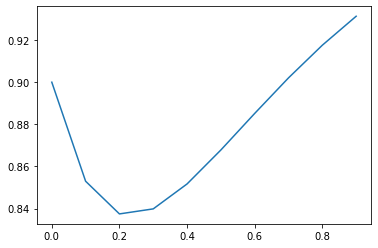

In [20]:
y_arr = np.array(y_arr)
t_arr = np.array(t_arr)

plt.plot(t_arr, y_arr)

# Euler Method (radioactive decay)

1.000000 	 99.000000
2.000000 	 98.010000
3.000000 	 97.029900
4.000000 	 96.059601
5.000000 	 95.099005
6.000000 	 94.148015
7.000000 	 93.206535
8.000000 	 92.274469
9.000000 	 91.351725
10.000000 	 90.438208


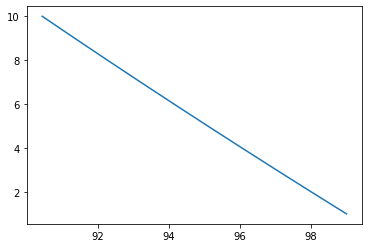

In [6]:
ds = lambda t,s: -lam*s

lam = 0.01
dt = 1.0
s = 100.0
ti = 0
tf = 10
dt = 1 # step size
n = int((tf-ti)/dt)
t = 1.0
s_arr = []
t_arr = []
s = 100

for i in range(0,n):
    s = s + ds(t,s) * dt
    s_arr.append(s)
    t_arr.append(t)
    print('%f \t %f'%(t,s))
    t = t+dt

s_arr = np.array(s_arr)
t_arr = np.array(t_arr)

plt.plot(s_arr, t_arr)

# Accuracy and stability

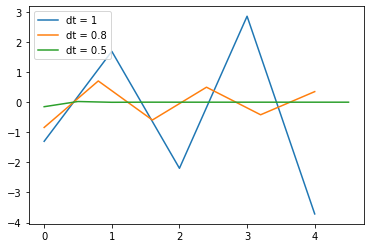

In [21]:
def f(t,y):
    dydt = -2.3*y
    return dydt

########### dt = 1.0 ##########

ti = 0
tf = 5
dt = 1
n = int((tf-ti)/dt)
y_arr = []
t_arr = []
y = 1
t = 0
for i in range(0,n):
    y = y + f(t,y) * dt
    y_arr.append(y)
    t_arr.append(t)
    #print('%f \t %f'%(t,y))
    t = t+dt
    
y_arr = np.array(y_arr)
t_arr = np.array(t_arr)
plt.plot(t_arr, y_arr, label='dt = 1')

########### dt = 0.8 ##########

ti = 0
tf = 5
dt = 0.8
n = int((tf-ti)/dt)
y_arr2 = []
t_arr2 = []
y = 1
t = 0
for i in range(0,n):
    y = y + f(t,y) * dt
    y_arr2.append(y)
    t_arr2.append(t)
    #print('%f \t %f'%(t,y))
    t = t+dt
y_arr2 = np.array(y_arr2)
t_arr2 = np.array(t_arr2)
plt.plot(t_arr2, y_arr2, label='dt = 0.8')    

########### dt = 0.5 ##########

ti = 0
tf = 5
dt = 0.5
n = int((tf-ti)/dt)
y_arr3 = []
t_arr3 = []
y = 1
t = 0
for i in range(0,n):
    y = y + f(t,y) * dt
    y_arr3.append(y)
    t_arr3.append(t)
    #print('%f \t %f'%(t,y))
    t = t+dt
y_arr3 = np.array(y_arr3)
t_arr3 = np.array(t_arr3)
plt.plot(t_arr3, y_arr3, label='dt = 0.5') 

plt.legend(loc='upper left')

# Implicit Euler method

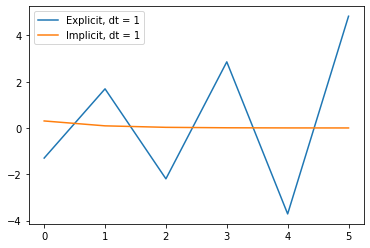

In [8]:
def f(t,y):
    dydt = -2.3*y
    return dydt

########### Explicit, dt = 1.0 ##########

ti = 0
tf = 6
dt = 1
n = int((tf-ti)/dt)
y_arr = []
t_arr = []
y = 1
t = 0
for i in range(0,n):
    y = y + f(t,y) * dt
    y_arr.append(y)
    t_arr.append(t)
    #print('%f \t %f'%(t,y))
    t = t+dt
    
y_arr = np.array(y_arr)
t_arr = np.array(t_arr)
plt.plot(t_arr, y_arr, label='Explicit, dt = 1')

########### Implicit, dt = 1.0 ##########
def f_new(t,y):
    y_i = y/(1+2.3*dt)
    return y_i

ti = 0
tf = 6
dt = 1
n = int((tf-ti)/dt)
y_arr2 = []
t_arr2 = []
y = 1
t = 0
for i in range(0,n):
    y = f_new(t,y)
    y_arr2.append(y)
    t_arr2.append(t)
    t = t+dt
    
y_arr2 = np.array(y_arr2)
t_arr2 = np.array(t_arr2)
plt.plot(t_arr2, y_arr2, label='Implicit, dt = 1')

plt.legend(loc='upper left')

# Runge-Kutta Method

copied from 
https://www.youtube.com/watch?v=C_WsQeOjbV4&ab_channel=Matthew%23314Engineering

but with added RK2

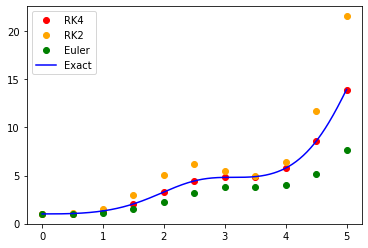

In [19]:
import math
import matplotlib.pyplot as plt

# Constants
T_0 = 0
Y_0 = 1

T_FINAL = 5
DT = 0.5
DT_EXACT = 0.01


# Functions
def f(t, y):
    return math.sin(t)**2 * y

def euler_step(t_i, y_i, dt, f):
    return y_i + dt*f(t_i, y_i)

def rk4_step(t_i, y_i, dt, f):
    k1 = f(t_i, y_i)
    k2 = f(t_i + dt/2, y_i + k1*dt/2)
    k3 = f(t_i + dt/2, y_i + k2*dt/2)
    k4 = f(t_i + dt, y_i + k3*dt)
    return y_i + dt/6*(k1 + 2*k2 + 2*k3 + k4)

def rk2_step(t_i, y_i, dt, f):
    k1 = f(t_i, y_i)
    k2 = f(t_i + dt/2, y_i + k1*dt/2)
    return (y_i + (k1+ k2)*dt/2 )

def y_exact(t_0, y_0, t):
    exp_arg = 1/2 * ( (t-t_0) - (math.sin(t)*math.cos(t) - math.sin(t_0)*math.cos(t_0)) )
    return y_0*math.exp(exp_arg)


# Computing exact result
t = T_0

ys_exact = []
ts_exact = []

while t < T_FINAL:
    ts_exact.append(t)
    ys_exact.append(y_exact(T_0, Y_0, t))
    t += DT_EXACT


# Computing approximate results
ts = [T_0]
ys = [Y_0]
ys2 = [Y_0]
ys_euler = [Y_0]

y = Y_0
y_euler = Y_0
t = T_0

while t < T_FINAL:
    # Solving with Runge-Kutta 4th order
    y = rk4_step(t, y, DT, f)
    
    # Solving with Runge-Kutta 2nd order
    y2 = rk2_step(t, y, DT, f)

    # Solving with Euler
    y_euler = euler_step(t, y_euler, DT, f)

    # Increasing t
    t += DT

    # Appending results
    ts.append(t)
    ys.append(y)
    ys2.append(y2)
    ys_euler.append(y_euler)


# Plotting
plt.plot(ts, ys, color='red', marker='o', linewidth=0.0, label='RK4')
plt.plot(ts, ys2, color='orange', marker='o', linewidth=0.0, label='RK2')
plt.plot(ts, ys_euler, color='green', marker='o', linewidth=0.0, label='Euler')
plt.plot(ts_exact, ys_exact, color='blue', label='Exact')
plt.legend()
plt.show()

# Pythonic Way

[[ 1.        ]
 [ 1.0551995 ]
 [ 1.42867962]
 [ 2.41325278]
 [ 3.86588488]
 [ 4.73586525]
 [ 4.8217121 ]
 [ 5.44757243]
 [ 8.12195535]
 [13.95733892]]


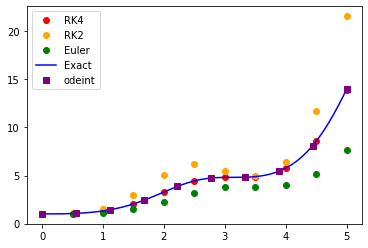

In [21]:
from scipy.integrate import odeint, solve_ivp

def f(y,t):
    dydt = math.sin(t)**2 * y
    return dydt

ti = 0
y0 = 1

tf = 5
dt = 0.5
n = int((tf-ti)/dt) # number of iterations = 10

t = np.linspace(ti, tf, n)

sol_odeint = odeint(f, y0, t)
print(sol_odeint)

plt.plot(ts, ys, color='red', marker='o', linewidth=0.0, label='RK4')
plt.plot(ts, ys2, color='orange', marker='o', linewidth=0.0, label='RK2')
plt.plot(ts, ys_euler, color='green', marker='o', linewidth=0.0, label='Euler')
plt.plot(ts_exact, ys_exact, color='blue', label='Exact')
plt.plot(t, sol_odeint, color='purple', linewidth=0.0, marker='s', label='odeint')
plt.legend()
plt.show()

In [23]:
t_span = np.array([ti, tf])

y0_arr = [y0]
times = np.linspace(t_span[0], t_span[1], n)
#t = np.linspace(ti, tf, n)

def f(t, y): # note: : solve_ivp expects f(t,y) as the right hand side of the ODE, not f(y,t)
    dydt = math.sin(t)**2 * y
    return dydt

sol_solve_ivp = solve_ivp(f, t_span, y0_arr, t_eval = times)
print(sol_solve_ivp)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 68
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])
 t_events: None
        y: array([[ 1.        ,  1.055439  ,  1.42860249,  2.41438136,  3.86715516,
         4.74122596,  4.82172263,  5.44988894,  8.12299693, 13.95924123]])
 y_events: None


In [24]:
print('Final answer')
print(sol_solve_ivp.y)

Final answer
[[ 1.          1.055439    1.42860249  2.41438136  3.86715516  4.74122596
   4.82172263  5.44988894  8.12299693 13.95924123]]
